<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/Iris_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load original Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Number of samples to generate
TOTAL_SAMPLES = 10000
SAMPLES_PER_CLASS = TOTAL_SAMPLES // 3

synthetic_data = []

np.random.seed(42)

for cls in df['species'].unique():
    class_data = df[df['species'] == cls].iloc[:, :-1]

    mean = class_data.mean()
    std = class_data.std()

    generated = np.random.normal(
        loc=mean,
        scale=std,
        size=(SAMPLES_PER_CLASS, class_data.shape[1])
    )

    class_df = pd.DataFrame(generated, columns=feature_names)
    class_df['species'] = cls
    synthetic_data.append(class_df)

# Combine all classes
large_iris_df = pd.concat(synthetic_data, ignore_index=True)

# Map species labels
large_iris_df['species'] = large_iris_df['species'].map(
    dict(enumerate(target_names))
)

print(large_iris_df.shape)
large_iris_df.head()


(9999, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.181087,3.375589,1.574480,0.406505,setosa
1,4.923463,3.339247,1.736252,0.326877,setosa
2,4.840515,3.633665,1.381521,0.196919,setosa
3,5.091289,2.702744,1.162444,0.186743,setosa
4,4.648987,3.547120,1.304309,0.097164,setosa


In [62]:
large_iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  9999 non-null   float64
 1   sepal width (cm)   9999 non-null   float64
 2   petal length (cm)  9999 non-null   float64
 3   petal width (cm)   9999 non-null   float64
 4   species            9999 non-null   object 
dtypes: float64(4), object(1)
memory usage: 390.7+ KB


In [63]:
import seaborn as sns

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder = LabelEncoder()

In [66]:
large_iris_df['species'] = encoder.fit_transform(large_iris_df['species'])
large_iris_df['species'].value_counts()

,count
species,
0,3333
1,3333
2,3333


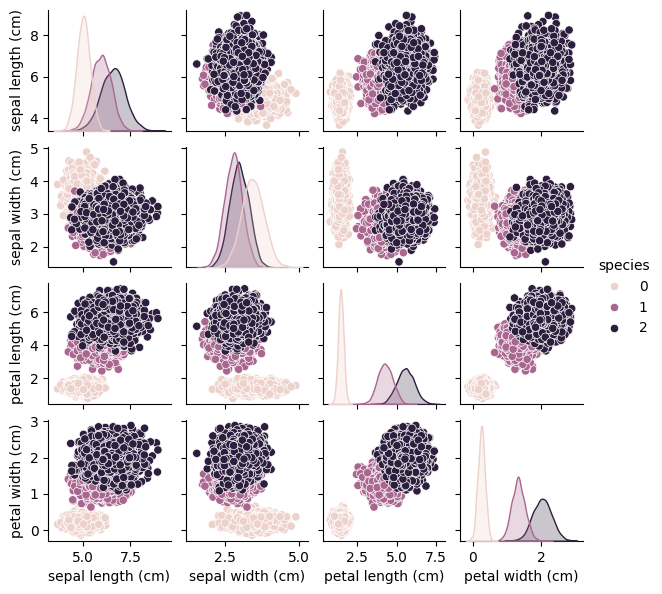

In [67]:
sns.pairplot(data = large_iris_df, hue='species', height=1.5)

In [68]:
x = large_iris_df.drop(columns='species')
y = large_iris_df.iloc[:, -1]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=3)

In [71]:
from sklearn.cluster import KMeans

In [72]:
import random

In [73]:
random_n = random.randint(1, 20)
kms = KMeans(n_clusters=random_n)

In [74]:
kms.fit(x_train, y_train)
y_pred = kms.predict(x_test)

In [75]:
from sklearn.metrics import silhouette_score

In [76]:
silhouette_avg = silhouette_score(x_test, y_pred)
print(f"The average silhouette score is: {silhouette_avg} for k: {random_n} clusters.")

The average silhouette score is: 0.47485570344110634 for k: 4 clusters.


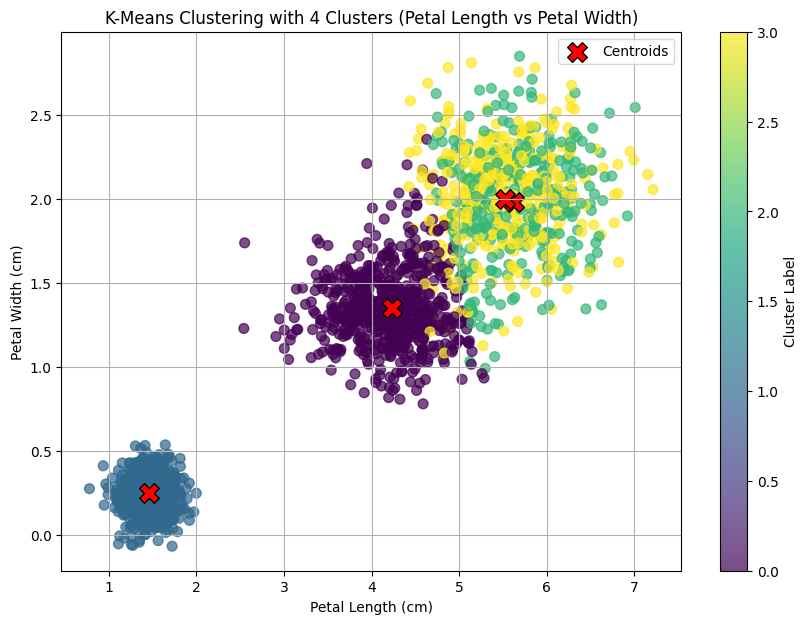

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plot data points, colored by predicted cluster
scatter = plt.scatter(x_test['petal length (cm)'], x_test['petal width (cm)'], c=y_pred, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
centroids = kms.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], marker='X', s=200, c='red', edgecolor='black', label='Centroids')

plt.title(f'K-Means Clustering with {random_n} Clusters (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

### Elbow method to get best k

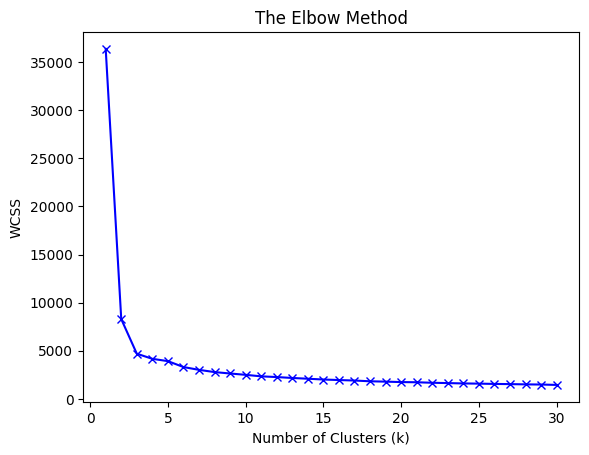

In [80]:
wcss = []
silh_list = []
for k_val in range(1, 31):
  kmeans = KMeans(n_clusters=k_val, random_state=3)
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)
  if k_val > 1:
    ypred = kmeans.predict(x_test)
    silh_list.append(silhouette_score(x_test, ypred))
  else:
    silh_list.append(np.nan) # Append NaN for k=1 as silhouette score is not defined

# Step 3: Plot the Elbow Curve
plt.plot(range(1, 31), wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

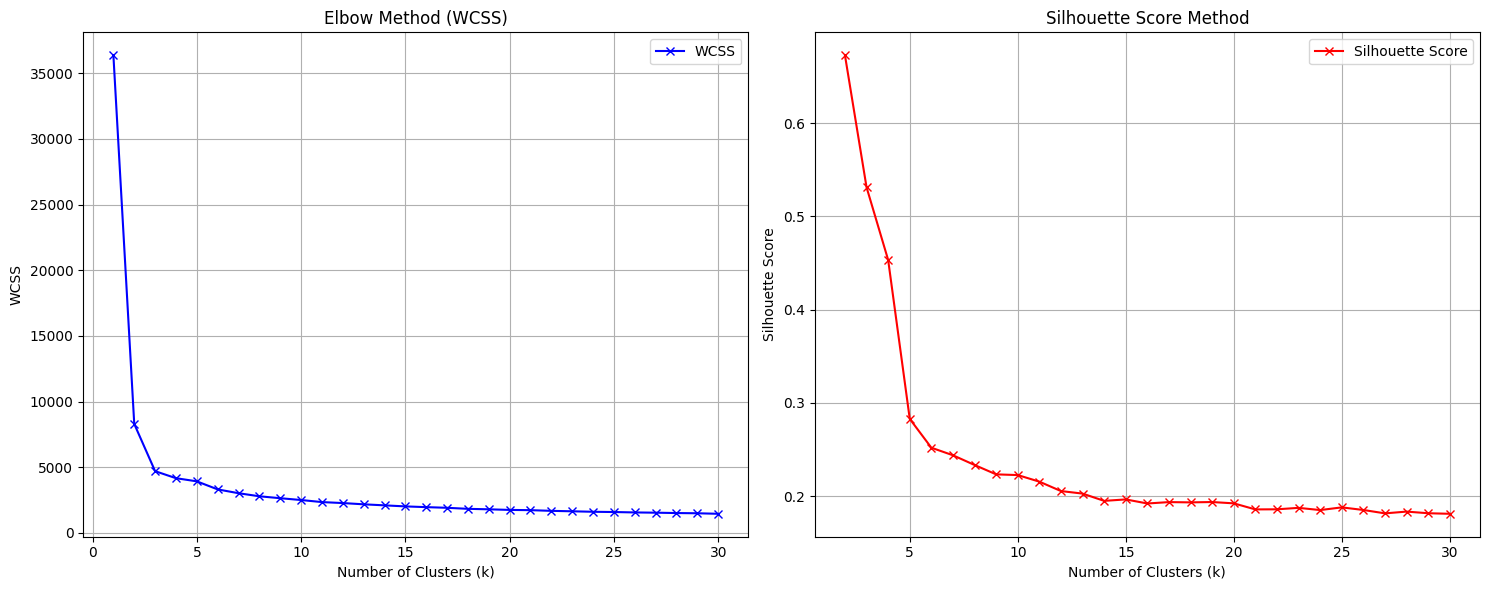

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Elbow Method (WCSS)
axes[0].plot(range(1, 31), wcss, 'bx-', label='WCSS')
axes[0].set_title('Elbow Method (WCSS)')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS')
axes[0].legend()
axes[0].grid(True)

# Second subplot: Silhouette Score Method
axes[1].plot(range(1, 31), silh_list, 'rx-', label='Silhouette Score')
axes[1].set_title('Silhouette Score Method')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Summary of Findings for Optimal K

**Elbow Method (WCSS):**
The WCSS plot shows a sharp decrease in inertia as the number of clusters (k) increases from 1 to around 3 or 4. After this point, the rate of decrease significantly slows down, forming an "elbow" shape. This suggests that 3 or 4 could be an optimal number of clusters, as adding more clusters beyond this point does not substantially reduce the within-cluster sum of squares.

**Silhouette Score Method:**
The Silhouette Score plot provides another perspective. A higher silhouette score indicates better-defined clusters. Looking at the plot, the silhouette score peaks at around k=2 or k=3, and then generally decreases or fluctuates at lower values as k increases. While k=2 gives a high silhouette score, the initial dataset (Iris) is known to have 3 species. A score around k=3 is also relatively high and aligns with the expected number of classes.

**Conclusion:**
Considering both the Elbow Method and the Silhouette Score, an optimal number of clusters appears to be **k=3**. The elbow method shows a clear bend around k=3, indicating diminishing returns for adding more clusters. The silhouette score also supports k=3 as a good choice, as it represents a reasonable peak or a strong local maximum that aligns with the inherent structure of the Iris dataset.